# Intro to Models
## Lecture 5, EM212: Applied Data Science

# This lecture will introduce:

1. A public dataset
2. Exploratory analysis
3. Linear models
4. Performing 1-3 using Python

We will be taking time at the end of class to play with the tools we just used.

# Let's pretend you're Ariana Grande

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Ariana_Grande_%2832426961944%29_%28cropped%29.jpg/198px-Ariana_Grande_%2832426961944%29_%28cropped%29.jpg)
photo: Emma Sheehan

### You've decided to go jewelry shopping with your friends


![alt text](https://upload.wikimedia.org/wikipedia/commons/6/6f/Brillanten.jpg)
photo: Mario Sarto

# How would you use data on this shopping expedition?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/13-08-09-hongkong-by-RalfR-038.jpg/320px-13-08-09-hongkong-by-RalfR-038.jpg)
photo: Ralf Roletschek

### Diamonds Dataset (Wickham, 2009)


A data frame with 53940 rows and 10 variables:

 price: price in US dollars (326--18,823)

 carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

# An aside

`ggplot2` is an extremely popular free-visualization library.  To learn more about it and to try using R visit:

https://r4ds.had.co.nz/data-visualisation.html


We'll be using Python.  For a good intro to the language, try https://www.codecademy.com/learn/learn-python

The lines below setup the tools we'll be using:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [3]:
cut_ranking = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(cut_ranking)
clarity_ranking = 'I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF'.replace(' ', '').split(',')
print(clarity_ranking)
color_ranking = diamonds.loc[:,'color'].drop_duplicates().sort_values(ascending=False).values
print(color_ranking)

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
['J' 'I' 'H' 'G' 'F' 'E' 'D']


In [4]:
columns_n_orders = {'cut': cut_ranking, 'clarity': clarity_ranking, 'color': color_ranking}

for column, ordering in columns_n_orders.items():
    diamonds.loc[:,column] = diamonds.loc[:,column]\
    .astype('category', ordered=True, categories=ordering)

We just made a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) to keep the column name and order we want together.  Then we [added the ordering the each column in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

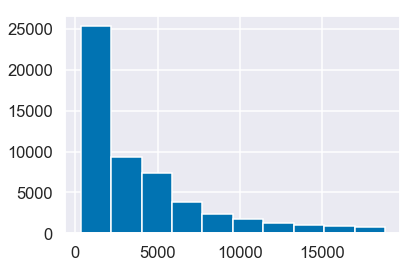

In [5]:
# a simple histogram in pandas

diamonds.price.hist()

In [6]:
# basic statistics in pandas

diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


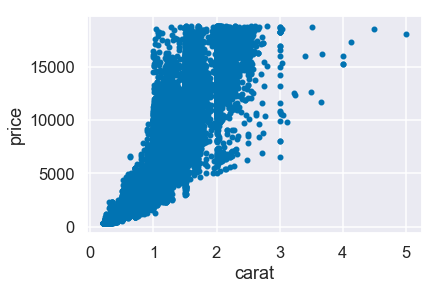

In [7]:
# a simple scatterplot 

diamonds.plot.scatter('carat', 'price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


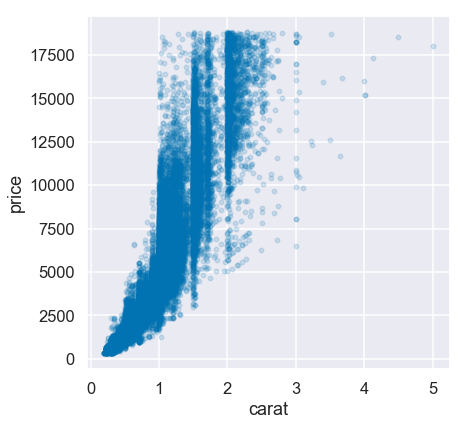

In [8]:
# a more easy to read scatterplot 
f, ax = plt.subplots(figsize=(6.5, 6.5))
diamonds.plot.scatter('carat', 'price', alpha=0.15,ax=ax)

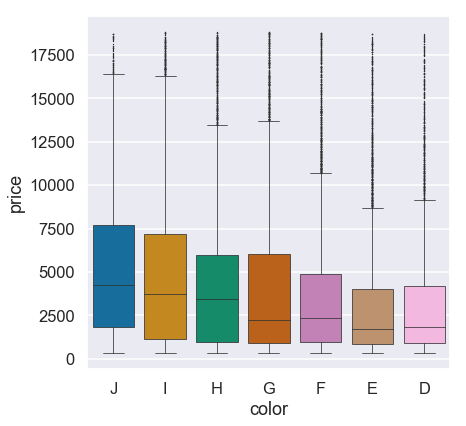

In [9]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(x="color", y="price", data=diamonds, fliersize=0.5, linewidth=0.75, ax=ax)

Plotting the other categorical variables is left to the reader.

What general trends do we see with relation to these rankings?

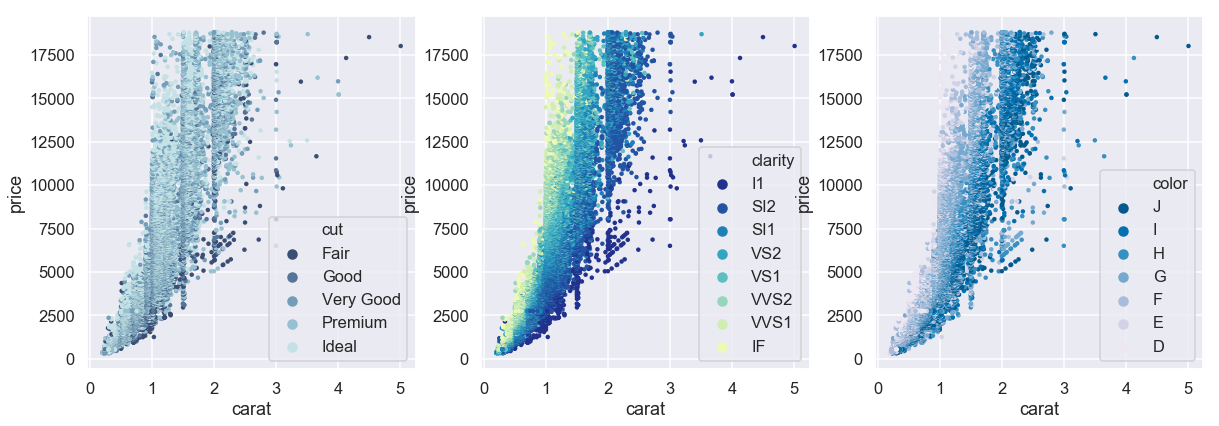

In [10]:
f, ax = plt.subplots(1, 3, figsize=(20, 6.5))
plot_info = pd.Series(columns_n_orders).reset_index()
plot_info.loc[:, 'palettes'] = ["ch:r=-.2,d=.3_r", 'YlGnBu_r', 'PuBu_r']
plot_info.rename(columns={'index': 'column_name', 0: 'ordering'}, inplace=True)
for i in plot_info.index:
    sns.scatterplot(x="carat", y="price",
                hue=plot_info.loc[i, 'column_name'],
                palette=plot_info.loc[i, 'palettes'],
                hue_order=plot_info.loc[i, 'ordering'],
                marker='.', linewidth=0,
                data=diamonds, ax=ax[i])

We can express these relationships as well using crosstabs.  Pandas will allow us to [group](https://pandas.pydata.org/pandas-docs/version/0.22/groupby.html) our data based on these categories and we can fill each cell with the average price or carat size.

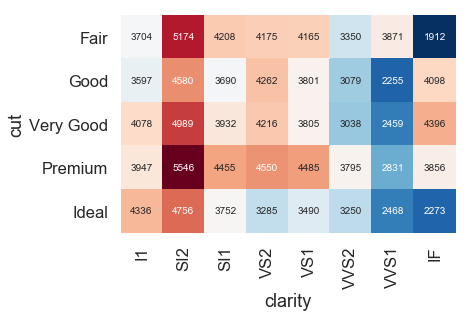

In [11]:
sns.heatmap(diamonds.groupby(['cut', 'clarity'])['price'].mean().unstack(),
            annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

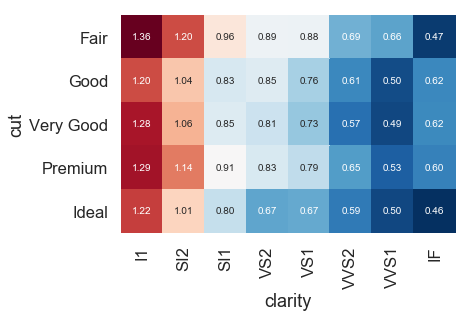

In [12]:
sns.heatmap(diamonds.groupby(['cut', 'clarity'])['carat'].mean().unstack(),
            annot=True, cbar=False, fmt='.2f', cmap='RdBu_r')

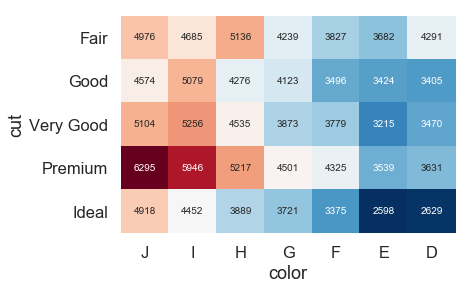

In [13]:
sns.heatmap(diamonds.groupby(['cut', 'color'])['price'].mean().unstack(),
            annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

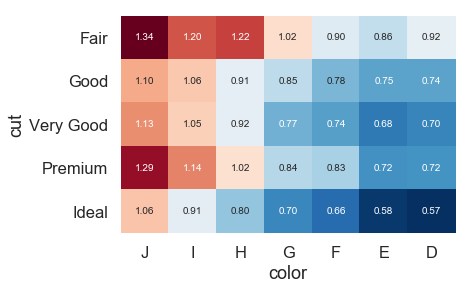

In [14]:
sns.heatmap(diamonds.groupby(['cut', 'color'])['carat'].mean().unstack(),
            annot=True, cbar=False, fmt='.2f', cmap='RdBu_r')

The last two heatmaps are left to the reader

# Enough visualization

Clearly there are various factors in the price of a diamond and they have their own relationships. 

Let's build a model

In [15]:
smf.ols('price ~ carat', data=diamonds).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        08:14:10   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

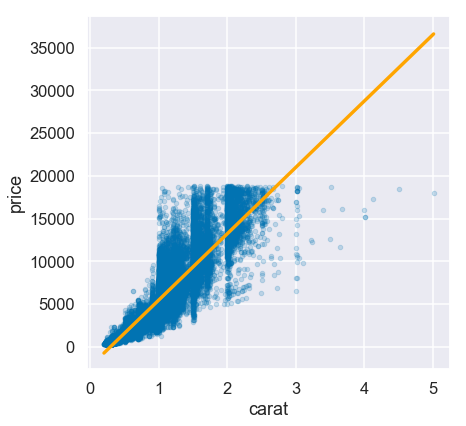

In [16]:
plt.subplots(figsize=(6.5, 6.5))
sns.regplot('carat', 'price', data=diamonds, marker='.',
            scatter_kws={'alpha':'0.2'}, line_kws={'color':'orange'}, truncate=True)

In [17]:
smf.ols('price ~ carat + cut + color + clarity', data=diamonds).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.264e+04
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        08:14:15   Log-Likelihood:            -4.5699e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53921   BIC:                         9.142e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9688.0245     55.610   -174.214      0.000   -9797.020   -9579.029
cut[T.Good]        655.7674     33.634     19.497      0.000     589.844     721.690
cut[T.Very Good]   848.7169     31.277     27.135      0.000     787.414     910.020
cut[T.Premium]     869.3959     30.931     28.108      0.000     808.771     930.021
cut[T.Ideal]       998.2544     30.656     32.563      0.000     938.168    1058.341
color[T.I]         884.9205     26.957     32.827      0.000     832.084     937.757
color[T.H]        1346.5247     25.462     52.883      0.000    1296.619    1396.431
color[T.G]        1819.0228     24.841     73.227      0.000    1770.334    1867.711
color[T.F]        2021.9123     25.339     79.793      0.000    1972.247    2071.578
color[T.E]        2113.5399     25.480     82.948      0.000    2063.598    2163.481
color[T.D]        2325.2224     26.723     87.013      0.000    2272.846    2377.599
clarity[T.SI2]    2625.9500     44.788     58.630      0.000    2538.164    2713.736
clarity[T.SI1]    3573.6880     44.598     80.132      0.000    3486.276    3661.100
clarity[T.VS2]    4217.8291     44.841     94.061      0.000    4129.940    4305.719
clarity[T.VS1]    4534.8790     45.535     99.591      0.000    4445.630    4624.128
clarity[T.VVS2]   4967.1994     46.891    105.932      0.000    4875.293    5059.105
clarity[T.VVS1]   5072.0276     48.211    105.205      0.000    4977.534    5166.521
clarity[T.IF]     5419.6468     52.136    103.952      0.000    5317.460    5521.834
carat             8886.1289     12.034    738.437      0.000    8862.543    8909.715
==============================================================================
Omnibus:                    15285.474   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183262.957
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                      11.796   Cond. No.                         38.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

But perhaps this is the wrong way to handle it.  Statsmodels has assumed that there isn't a linear relationship within cut or clarity or color, which isn't true.

In [18]:
for c in ['cut', 'color', 'clarity']:
    diamonds.loc[:,'%s_codes' % c] = diamonds.loc[:,'%s' % c].cat.codes


In [19]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_codes,color_codes,clarity_codes
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,5,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1


In [20]:
smf.ols('price ~ carat + cut_codes + color_codes + clarity_codes', data=diamonds).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.272e+05
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        08:14:15   Log-Likelihood:            -4.6053e+05
No. Observations:               53940   AIC:                         9.211e+05
Df Residuals:                   53935   BIC:                         9.211e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6218.3384     27.054   -229.851      0.000   -6271.364   -6165.313
carat          8783.7718     12.692    692.087      0.000    8758.896    8808.648
cut_codes       155.6999      4.863     32.014      0.000     146.167     165.232
color_codes     319.6727      3.302     96.808      0.000     313.200     326.145
clarity_codes   524.8435      3.527    148.799      0.000     517.930     531.757
==============================================================================
Omnibus:                    10789.064   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251931.502
Skew:                           0.366   Prob(JB):                         0.00
Kurtosis:                      13.562   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lab Section

If your data is available online you can [load it into pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) with a url to the csv or xls file

To get everyone started, here is some data from [Chu, 2001](http://jse.amstat.org/v9n2/datasets.chu.html)

carat: weight of diamond stones in carat units

color: Colour - D, E, F, G, H or I

clarity: IF, VVS1, VVS2, VS1 or VS2

Certification Body: GIA, IGI or HRD

price: Price (Singapore $)

In [21]:
straits_data = pd.read_csv('http://jse.amstat.org/v9n2/4Cdata.txt', sep = '\s+', names=['carat', 'color', 'clarity', 'certification', 'price_sg'])
straits_data.head()

,carat,color,clarity,certification,price_sg
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


Some exploratory data analysis to share:
    
- Calculate basic statistics (mean, median, quantiles, etc.)
- Plot histograms, boxplots
- Calculate crosstabs
- Decide how to represent your data (merging, variable transformations)
- Scatterplot of continuous variables
- Perform simple regression models